In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 28.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
distance=ctrl.Antecedent(np.arange(0,55,1),'distance')
traffic=ctrl.Antecedent(np.arange(0,101,1),'traffic')
demand=ctrl.Antecedent(np.arange(0,101,1),'demand')
weather=ctrl.Antecedent(np.arange(0,10,1),'weather')
rating=ctrl.Antecedent(np.arange(0,5.1,0.1),'rating')
punctuality=ctrl.Antecedent(np.arange(0,101,1),'punctuality')
price=ctrl.Consequent(np.arange(0,11,1),'price')
point=ctrl.Consequent(np.arange(0,11,1),'point')

In [ ]:
distance['short']=fuzz.trimf(distance.universe,[0,2,3])
distance['medium']=fuzz.trimf(distance.universe,[2,5,8])
distance['long']=fuzz.trimf(distance.universe,[6,14,20])
distance['very long']=fuzz.trimf(distance.universe,[15,35,50])

In [ ]:
traffic['low']=fuzz.trimf(traffic.universe,[0,20,30])
traffic['medium']=fuzz.trimf(traffic.universe,[20,40,70])
traffic['high']=fuzz.trimf(traffic.universe,[60,80,100])


In [ ]:
demand['low']=fuzz.trimf(demand.universe,[0,20,30])
demand['medium']=fuzz.trimf(demand.universe,[20,50,70])
demand['high']=fuzz.trimf(demand.universe,[60,75,100])

In [ ]:
weather['bad']=fuzz.trimf(weather.universe,[0,2,4])
weather['moderate']=fuzz.trimf(weather.universe,[3,5,7])
weather['good']=fuzz.trimf(weather.universe,[6,8,10])

In [ ]:
rating['poor']=fuzz.trimf(rating.universe,[0,1,2.5])
rating['average']=fuzz.trimf(rating.universe,[2,3,4])
rating['good']=fuzz.trimf(rating.universe,[3.5,4.2,5])

In [ ]:
punctuality['late']=fuzz.trimf(punctuality.universe,[0,25,50])
punctuality['on_time']=fuzz.trimf(punctuality.universe,[40,60,80])
punctuality['early']=fuzz.trimf(punctuality.universe,[70,85,100])

In [ ]:
price['low']=fuzz.trimf(price.universe,[0,1,4])
price['medium']=fuzz.trimf(price.universe,[2,3,5])
price['high']=fuzz.trimf(price.universe,[4,5,7])
price['very high']=fuzz.trimf(price.universe,[6,8,10])

In [ ]:
point['none']=fuzz.trimf(point.universe,[0,1,3])
point['few']=fuzz.trimf(point.universe,[2,4,6])
point['moderate']=fuzz.trimf(point.universe,[5,6,8])
point['high']=fuzz.trimf(point.universe,[7,9,10])

In [ ]:
rule1=ctrl.Rule(distance['short']& traffic['low']& demand['low'], price['low'])
rule2=ctrl.Rule(distance['short']& traffic['medium']& demand['high'], price['medium'])
rule3=ctrl.Rule(distance['medium']& traffic['high']& demand['high'], price['high'])
rule4=ctrl.Rule(distance['long']& traffic['medium']& weather['good'], price['medium'])
rule5=ctrl.Rule(distance['long']& traffic['high']& weather['bad'], price['very high'])
rule6=ctrl.Rule(distance['very long']& traffic['high']& demand['high'], price['very high'])
rule7=ctrl.Rule(distance['medium']& traffic['low']& demand['low'], price['medium'])
rule8=ctrl.Rule(distance['short']& traffic['high']& weather['bad'], price['high'])
rule9=ctrl.Rule(distance['very long']& weather['bad'], price['very high'])
rule10=ctrl.Rule(distance['medium']& traffic['medium']& weather['moderate'], price['medium'])
rule11=ctrl.Rule(rating['good']& punctuality['early'], point['high'])
rule12=ctrl.Rule(rating['average']& punctuality['on_time'], point['moderate'])
rule13=ctrl.Rule(rating['poor']& punctuality['late'], point['none'])
rule14=ctrl.Rule(distance['long']& traffic['high']& punctuality['on_time'], point['high'])
rule15=ctrl.Rule(distance['medium']& traffic['medium']& rating['good'], point['moderate'])
rule16=ctrl.Rule(rating['poor']& punctuality['late'], point['none'])
rule17=ctrl.Rule(distance['very long']& weather['bad']& rating['good'], point['high'])
rule18=ctrl.Rule(distance['short']& rating['average']& punctuality['on_time'], point['few'])
rule19=ctrl.Rule(distance['long']& traffic['high']& punctuality['late'], point['few'])
rule20=ctrl.Rule(distance['medium']& weather['moderate']& rating['good'], point['moderate'])

gia di xe 4.642953929539296
diem thuong 7.800000000000001


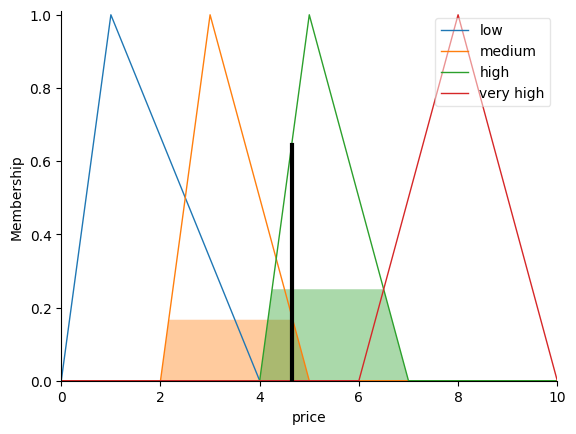

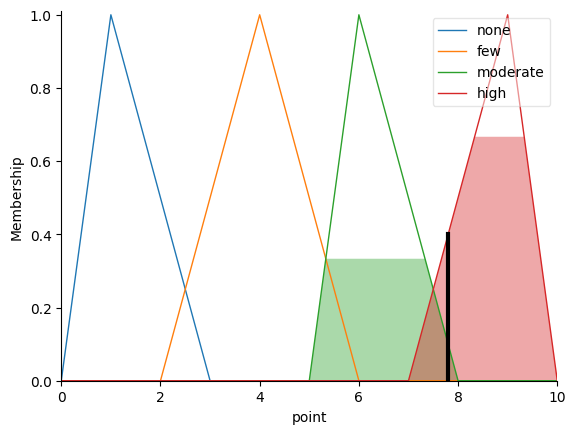

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
system=ctrl.ControlSystemSimulation(control_system)
system.input['distance']=7
system.input['traffic']=65
system.input['weather']=6
system.input['rating']=4.1
system.input['punctuality']=80
system.input['demand']=90
system.compute()
print('gia di xe',system.output['price'])
print('diem thuong',system.output['point'])
price.view(sim=system)
point.view(sim=system)